In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[9997]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence] = 1.
        return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
'''x = [[5, 1, 3, 2, 4], [5, 1, 3, 2, 4], [1, 2, 3, 4, 9]]
results = np.zeros((len(x), 10))
for i, sequence in enumerate(x):
    results[i, sequence] = 1
print(results)
'''

'x = [[5, 1, 3, 2, 4], [5, 1, 3, 2, 4], [1, 2, 3, 4, 9]]\nresults = np.zeros((len(x), 10))\nfor i, sequence in enumerate(x):\n    results[i, sequence] = 1\nprint(results)\n'

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from keras import models
from keras import layers

In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
from keras import optimizers
from keras import losses
from keras import metrics

In [51]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [21]:
#pass custom losses and metrics & configure optimizers
#model.compile(optimizer=optimizers.RMSprop(1r=0.001),
 #            loss=losses.binary_crossentropy,
  #           metrics=[metrics.binary_accuracy])

In [57]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [58]:
# Training the model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.4607 - acc: 0.7855 - val_loss: 0.3425 - val_acc: 0.8579
Epoch 2/20
15000/15000 [==============================] - 7s 442us/step - loss: 0.2397 - acc: 0.9061 - val_loss: 0.3481 - val_acc: 0.8588
Epoch 3/20
15000/15000 [==============================] - 4s 265us/step - loss: 0.1724 - acc: 0.9354 - val_loss: 0.3042 - val_acc: 0.8798
Epoch 4/20
15000/15000 [==============================] - 5s 356us/step - loss: 0.1286 - acc: 0.9525 - val_loss: 0.4150 - val_acc: 0.8620
Epoch 5/20
15000/15000 [==============================] - 7s 452us/step - loss: 0.1166 - acc: 0.9561 - val_loss: 0.3621 - val_acc: 0.8775
Epoch 6/20
15000/15000 [==============================] - 7s 440us/step - loss: 0.0930 - acc: 0.9700 - val_loss: 0.4017 - val_acc: 0.8762
Epoch 7/20
15000/15000 [==============================] - 7s 440us/step - loss: 0.0662 - acc: 0.9775 - val_loss: 0.4500 - 

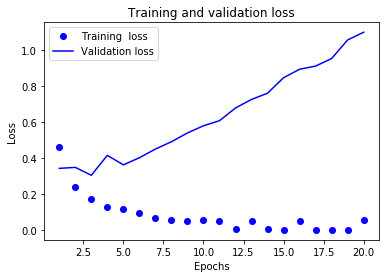

In [59]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training  loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

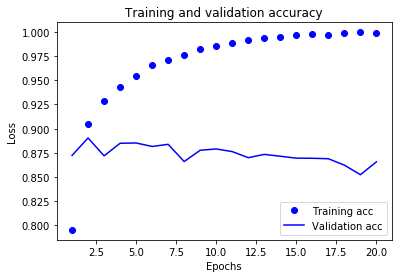

In [39]:
# Plot the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 6s 256us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.2661 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 3s 120us/step - loss: 0.1983 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 7s 275us/step


In [42]:
results

[0.32464027587890626, 0.87312]

In [43]:
model.predict(x_test)

array([[0.14118339],
       [0.99970514],
       [0.2838982 ],
       ...,
       [0.07013782],
       [0.04280325],
       [0.47345236]], dtype=float32)